In [5]:
from shekar.embeddings import WordEmbedder

embbeder = WordEmbedder(oov_strategy="none")
embbeder("سلام")

array([-2.3539007 ,  1.5861996 , -0.41718495, -0.1337983 , -1.0198578 ,
       -2.49168   , -2.9495087 ,  1.6001046 ,  0.27495974,  0.5915661 ,
        0.37176704, -0.11603346, -1.5804946 , -0.2514104 , -2.254956  ,
       -0.96322685, -0.11933734, -3.5396662 ,  2.675409  , -1.1635991 ,
        1.1427003 ,  0.17001174,  0.08894097,  1.1602708 , -0.18631731,
       -1.6067432 ,  0.1293025 , -0.49297154, -0.4376659 , -3.5051768 ,
        0.80391145,  2.6548862 , -1.9690646 , -1.0249883 ,  0.38446367,
       -3.4372065 , -1.9568985 ,  1.8756187 , -0.6682907 , -0.8531838 ,
       -0.0246732 , -0.57854426,  1.3222942 , -1.8942132 , -1.704856  ,
       -0.6697789 ,  0.01809506,  0.9659376 ,  0.15444475,  0.24157815,
       -1.3395963 , -0.42030933,  3.162371  , -0.1855927 , -2.2521155 ,
       -0.6851644 ,  0.02112731,  0.81633055, -3.1004426 , -0.18303151,
        0.77843374, -3.4085443 , -2.2297087 , -0.24922648,  2.957557  ,
        1.0221881 ,  2.259149  , -2.5693746 ,  1.9445043 ,  3.48

In [6]:
embbeder.similarity("سلام", "درود")

0.623503

In [7]:
embbeder.most_similar("سیب", top_n=15)

[('انگور', 0.8592497),
 ('سیب\u200cزمینی', 0.8466943),
 ('میوه', 0.842713),
 ('بادام', 0.8349076),
 ('خربزه', 0.8321823),
 ('زردآلو', 0.82332546),
 ('انار', 0.8199595),
 ('آلوچه', 0.8193275),
 ('گوجه\u200cفرنگی', 0.8175793),
 ('میوه\u200cجات', 0.81482154),
 ('گوجه', 0.8145238),
 ('توت', 0.81279147),
 ('خرما', 0.81219),
 ('سیبک', 0.8113389),
 ('گردو', 0.8088691)]

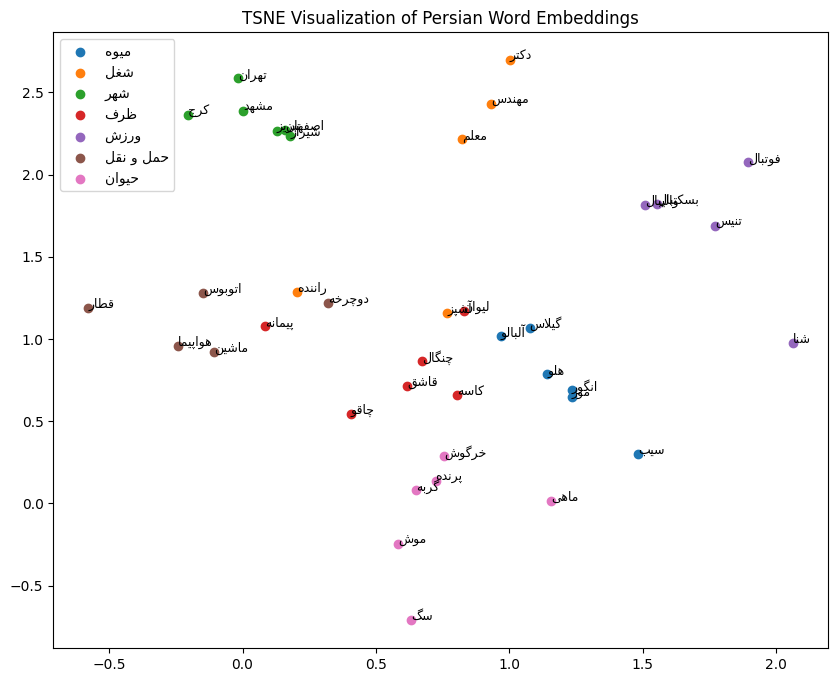

In [8]:
from sklearn.manifold import TSNE
import numpy as np
import matplotlib.pyplot as plt
import arabic_reshaper
from bidi.algorithm import get_display

def fix_persian(text: str) -> str:
    return get_display(arabic_reshaper.reshape(text))

# Categories
categories = {
    "میوه": ["سیب", "موز", "انگور", "هلو", "آلبالو", "گیلاس", "توت فرنگی"],
    "شغل": ["برنامه نویس", "مهندس", "دکتر", "معلم", "راننده", "آشپز"],
    "شهر": ["تهران", "اصفهان", "شیراز", "مشهد", "تبریز", "کرج"],
    "ظرف": ["قاشق", "چنگال", "چاقو", "لیوان", "کاسه", "پیمانه"],
    "ورزش": ["فوتبال", "بسکتبال", "والیبال", "تنیس", "شنا", "دوچرخه سواری"],
    "حمل و نقل": ["ماشین", "اتوبوس", "قطار", "هواپیما", "دوچرخه", "موتور سیکلت"],
    "حیوان": ["گربه", "سگ", "پرنده", "ماهی", "خرگوش", "موش"],
}

words, labels = [], []
for cat, items in categories.items():
    words.extend(items)
    labels.extend([cat] * len(items))


in_vocab_words, in_vocab_labels, embeddings = [], [], []
for word, label in zip(words, labels):
    vec = embbeder(word)
    if vec is not None:
        embeddings.append(vec)
        in_vocab_words.append(word)
        in_vocab_labels.append(label)

embeddings = np.vstack(embeddings)

tsne = TSNE(n_components=2, random_state=42, init="pca", learning_rate="auto")
embeddings_2d = tsne.fit_transform(embeddings)


plt.figure(figsize=(10, 8))
for cat in categories:
    idx = [i for i, label in enumerate(in_vocab_labels) if label == cat]
    if not idx:
        continue
    plt.scatter(embeddings_2d[idx, 0], embeddings_2d[idx, 1], label=fix_persian(cat))
    for i in idx:
        plt.text(embeddings_2d[i, 0], embeddings_2d[i, 1], fix_persian(in_vocab_words[i]), fontsize=9)

plt.legend()
plt.title("TSNE Visualization of Persian Word Embeddings")
plt.show()
